## 13장. 최단 경로 문제
---

```최단 경로 문제는 각 간선의 가중치 합이 최소가 되는 두 정점 사이의 경로를 찾는 문제```

- 최단 경로는 지도 상의 한 지점에서 다른 지점으로 갈 때 가장 빠른 길을 찾는 것과 비슷한 문제
 - 내비게이션에서 목적지로 이동할 때, 경로 탐색을 하면 나오는 최적의 경로 문제가 최소 비용이 되는 최단 경로 문제
- 경로 용어
 - 정점: 교차로에 해당
 - 간선: 길에 해당
 - 가중치: 거리나 시간과 같은 이동 비용이 해당
- 최단 경로 알고리즘 중에 가장 유용한 알고리즘은 다익스트라 알고리즘
 - 항상 노드 주변의 최단 경로만을 택하는 대표적인 그리디 알고리즘(21장)
  - 단순할 뿐만 아니라 실행 속도 또한 빠름
 - 노드 주변을 탐색할 때 BFS(너비 우선 탐색)를 이용
  

### 1. 네트워크 딜레이 타임

K부터 출발해 모든 노드가 신호를 받을 수 있는 시간을 계산하라. 불가능한 경우 -1을 리턴한다. 입력값 (u, v, w)는 각각 출발지, 도착지, 소유 시간으로 구성되며, 전체 노드의 개수는 N으로 입력받는다.

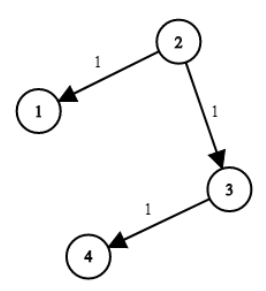



- 입력<br>
```
time = [[2,1,1],[2,3,1],[3,4,1]], N=4, K=2
```

- 출력<br>
```
2
```

#### 문제1. 다익스트라 알고리즘 구현

이 문제에서 다음과 같은 2가지 사항을 판별해야 한다.
1. 모든 노드가 신호를 받는 데 걸리는 시간
 - 가장 오래 걸리는 노드까지의 시간, 즉 가장 오래 걸리는 노드까지의 최단 시간
2. 모든 노드에 도달할 수 있는지 여부
 - 다익스트라 알고리즘 계산 값이 존재하는지 유무로 판별
    - 만약 노드가 8개인데 다익스트라 알고리즘 계산은 7개 밖에 없다면, 나머지 노드에 도달할 수 없다는 의미, 이경우 -1을 리턴
    
- 다익스트라 알고리즘을 효율적으로 구현하기 위해 우선순위 큐를 적용하는 방식을 사용
 - 파이썬에서 우선순위 큐를 최소 힙으로 구현한 모듈인 heapq를 사용한 형태로 구현

다익스트라 알고리즘 수도코드
```
 function Dijkstra(Graph, source):
     dist[source] ← 0                                  
     
     create vertex priority queue Q
     
     for each vertex v in Graph:
         if v ≠ source
             dist[v] ← INFINITY                        
         prev[v] ← UNDEFINED                            

         Q.add_with_priority(v, dist[v]) #

     while Q is not empty:                         
         u ← Q.extract_min() #              
         for each neighbor v of u: #        
             alt ← dist[u] + length(u, v)
             if alt < dist[v]
                 dist[v] ← alt
                 prev[v] ← u
                 Q.decrease_priority(v, alt)

     return dist, prev 
```

- Q.add_with_priority(v, dist[v]): 그래프에서 각 정점과 거리를 우선순위 큐에 삽입하는 부분
- u ← Q.extract_min(): 우선순위 큐에서 최소 값 추출
- for each neighbor v of u: 이웃을 살펴보는 코드

**실제 실행 가능한 파이썬 코드로 구현**

```
        graph = collections.defaultdict(list)
        for u, v, w in times:
            graph[u].append((v, w))
```

- 입력 값은(u, v, w) 아이템 목록으로 구성된 리스트 형태
 - 키/값 구조로 조회할 수 있는 그래프 구조는 아님(딕셔너리형이 아님)
   - 그래프를 인접한 리스트로 표현하는 딕셔너리로 만듬(collections.defaultdict사용)
   
```
        Q = [(0, K)]
        dist = collections.defaultdict(int)
```

- 큐 변수 Q는 (소요시간, 정점) 구조로 구성
 - 시작점에서 "정점"까지의 소요 시간을 담아둠
 - 초기 값은 k부터 시작하여 소요 시간은 0으로 설정
- dist는 초기값을 설정하지 않음

```
        while Q:
            time, node = heapq.heappop(Q) 
            if node not in dist:
                dist[node] = time
                for v, w in graph[node]:
                    alt = time + w
                    heapq.heappush(Q, (alt, v))
```

- 큐 순회를 시작하자마자 최솟값을 추출하는 건 수도코드와 동일
 - 바로 for each 구문으로 이웃 노드를 순회했던 수도코드와 달리, dist에 node의 포함 여부 먼저 체크
 - 수도코드 dist는 무한대 값으로 채우고 시작하지만,  heapq에 dist는 아무 값도 세팅하지 않고 비워놓고 진행
    - 힙 푸시를 통해 구현하기 위해(우선순위 업데이트 기능이 없어서)
- 수도코드는 우선순위 조정을 사용, heapq은 우선순위 조정 기능을 지원x

```
        if len(dist) == N:
            return max(dist.values())
        return -1
```

- dist 딕셔너리의 키 개수가 N과 동일한지 체크
- 전체 노드 개수만큼이 모두 dist에 있다면 모든 노드의 최단 경로를 구한것
- 노드의 개수가 모자라면 도달하지 않았기 때문에 -1을 리턴함

**예제를 통한 이해**

- 입력값 [[3,1,5],[3,2,2],[2,1,2],[3,4,1],[4,5,1],[5,6,1],[6,7,1],[7,8,1],[8,1,1]]
- N=8, K=3

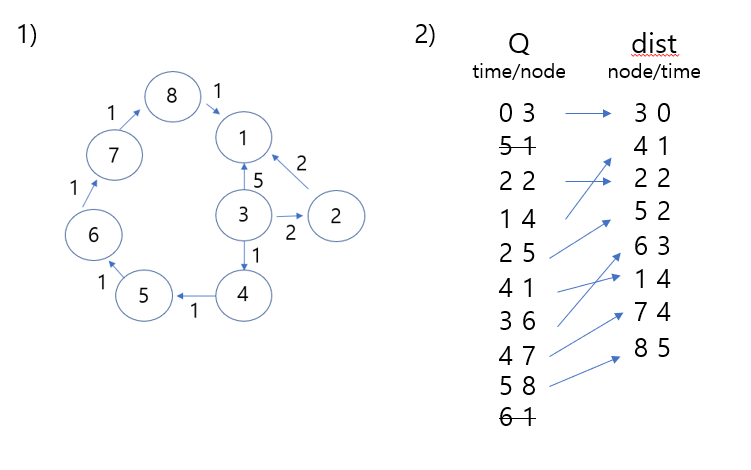

- 1)은 입력값을 그래프로 표시, 시작점 3을 중심으로 뻗어나가는 구조
- 2)의 Q와 dist는 위에서 부터 차례로, 변수에 삽입되는 순서대로 값을 나열
 - Q는 우선순위 큐이므로 값이 계속 쌓이다 낮은 값부터 하나씩 추출(최소힙)
 - dist에 존재하지 않으면 dist값으로 입력되며 time과 node의 순서가 변경
    - 이미 dist에 값이 존재하면 그 값을 삭제
- 노드 1은 3 → 2 → 1 순서로 방문하는 것이 가장 가까움(3 → 1은 5로 4보다 멀어서 삭제)


In [ ]:
import collections
import heapq
from typing import List


class Solution:
    def networkDelayTime(self, times: List[List[int]], N: int, K: int) -> int: # N은 노드의 수, K: 도착점, 기본적인 구조 셋팅
        graph = collections.defaultdict(list) # collections: 컨테이너(객체)동일한 값을 파악, defaultdict: 딕셔너리 형식으로 변경
        # 그래프 인접 리스트 구성
        for u, v, w in times:
            graph[u].append((v, w))
            # print(graph[u]) # 딕셔너리 형으로 변환을 확인

        # 큐 변수: [(소요 시간, 정점)]
        Q = [(0, K)]
        dist = collections.defaultdict(int)
        print(Q)

        # 우선 순위 큐 최소값 기준으로 정점까지 최단 경로 삽입
        while Q:
            time, node = heapq.heappop(Q) # heapq.heappop: heap에서 가장 작은 원소를 pop & 리턴. 비어 있는 경우 IndexError가 호출됨
            if node not in dist:
                dist[node] = time
                for v, w in graph[node]:
                    alt = time + w
                    heapq.heappush(Q, (alt, v))

        # 모든 노드 최단 경로 존재 여부 판별
        if len(dist) == N:
            return max(dist.values())
        return -1
    
if __name__ == '__main__':
  s = Solution()
  print(s.networkDelayTime([[2,1,1],[2,3,1],[3,4,1]], N=4, K=2))

[(0, 2)]
2


### 2. K경유지 내 가장 저렴한 항공권

시작점에서 도착점까지의 가장 저렴한 가격을 계산하되, K개의 경유지 이내에 도착하는 가격을 리턴하라. 경로가 존재하지 않을 경우 -1을 리턴한다.

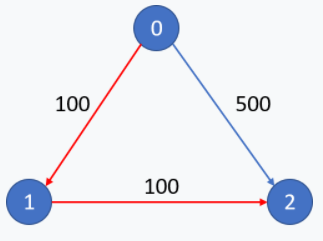

- 입력<br>
```
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]
src = 0, dst = 2, k = 0
```
- 출력<br>
```
500
```
- 설명<br>
시작점 src노드 0에서 도착점 dst 노드 2까지 최저가는 0→1→2 경로인 200이지만, 여기서는 입력값이 k=0으로 경유지가 하나도 없어야 하므로 이 조건을 만족하는 최저가는 0-2인 500이다.

#### 문제1. 다익스트라 알고리즘 응용

- 가격을 시간이라고 가정한다면 최단 시간을 계산하는 경로는 앞의 다익스트라 알고리즘과 동일하게 구현 가능
 - 한 가지 제약사항이 추가되었는데 k개의 경유지 이내에 도착
    - 알고리즘의 구현을 위해 우선순위큐에 추가할 때 k 이내의 경로를 추가하는 K는 탐색되지 않게 설정

**다익스트라 알고리즘 코드 변형**

```
def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        graph = collections.defaultdict(list)
        for u, v, w in flights:
            graph[u].append((v, w))

        Q = [(0, src, K)]

        while Q:
            time, node = heapq.heappop(Q) 
            if node not in dist:
                dist[node] = time
                for v, w in graph[node]:
                    alt = time + w
                    heapq.heappush(Q, (alt, v))
```

- 함수 명과, time변수 명 변경
- 전체 거리를 보관할 필요가 없어 dist 삭제
- 경로 개수 삭제(if len(dist) == N:)

```
def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        graph = collections.defaultdict(list)
        for u, v, w in flights:
            graph[u].append((v, w))

        k = 0
        Q = [(0, src, K)]

        while Q:
            time, node = heapq.heappop(Q) 
            if node dst:
                return price
            if k <= K:   ①
                k += 1
                for v, w in graph[node]:
                    alt = time + w
                    heapq.heappush(Q, (alt, v, k))
```

- 우선순위 큐에 경유 횟수를 k로 설정하여 0부터 순서대로 함께 기입
- k 이내일 때만(k <= K) 우선 순위 큐에 경로를 추가하고 K를 넘어서는 경로는 더 이상 탐색되지 않게 ①을 추가
- 노드가 도착지라면 결과를 리턴하고 종류
 - 큐를 끝까지 순호해도 찾지 못하면 경로가 없는 것으로 간주하고 -1을 리턴
- 위와 같이 ```if k <= K:```문구는 혼동이 될 수 있으므로 아래와 같이 변경

```
        while Q:
            price, node, k = heapq.heappop(Q)
            if node == dst:
                return price
            if k >= 0:
                for v, w in graph[node]:
                    alt = price + w
                    heapq.heappush(Q, (alt, v, k - 1))
```

- 경유지가 하나 늘때 마다 k - 1하는 형태로 변경



In [ ]:
import collections
import heapq
from typing import List


class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        graph = collections.defaultdict(list)
        # 그래프 인접 리스트 구성
        for u, v, w in flights:
            graph[u].append((v, w))

        # 큐 변수: [(가격, 정점, 남은 가능 경유지 수)]
        Q = [(0, src, K)]
        

        # 우선 순위 큐 최소값 기준으로 도착점까지 최소 비용 판별
        while Q:
            price, node, k = heapq.heappop(Q)
            if node == dst:
                return price
            if k >= 0:
                for v, w in graph[node]:
                    alt = price + w
                    heapq.heappush(Q, (alt, v, k - 1))
        return -1

if __name__ == '__main__':
  s = Solution()
  print(s.findCheapestPrice(n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, K = 0))

500
